In [23]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

In [60]:
df = {}
for i in range(8):
    if i < 4:
        df[i] = pd.read_table('lpr_200'+str(i+6)+'.csv')
    else:
        df[i] = pd.read_table('lpr_20'+str(i+6)+'.csv')
    df[i] = df[i][0:8]
    df[i] = df[i].reindex(df[i].index.delete(4)).reset_index()

print df[4].shape

(7, 58)


In [231]:
df[0]

,index,Origin,Total,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,...,Texas,U.S. Armed Services Posts,U.S. Dependencies,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,Total,1266264,4278,1554,21530,2926,264677,12714,18700,...,89037,95,7080,5749,895,38488,23805,764,8341,376
1,1,Africa,117430,441,40,1804,143,9384,1843,1220,...,8623,6,21,602,246,7157,3057,78,688,23
2,2,Asia,422333,1739,819,4628,959,121890,3460,4345,...,24601,46,2131,1228,243,14433,9600,345,3706,123
3,3,Europe,164285,648,293,2235,274,25822,2181,4312,...,5261,14,182,745,189,3471,6144,131,1506,80
4,5,Northern America,240343,592,177,1918,417,27606,1008,3840,...,9814,15,3777,640,150,6489,1605,112,650,47
5,6,Oceania,7385,24,41,122,24,3001,160,85,...,270,0,20,211,16,104,377,7,55,16
6,7,Latin America,311754,818,180,10783,1103,76130,4045,4870,...,40327,14,937,2309,51,6784,2991,91,1720,87


In [26]:
def clean(x):
    try:
        return int(x)
    except:
        pass

for i in range(8):
    df[i].fillna(0)

In [27]:
def line_plot(data,title,xlabel,ylabel,xticks,legend):
    plt.figure(figsize=(15,11))
    xvals = 0
    p = {}
    for i,val in enumerate(data):
        xvals = np.arange(len(val))
        p[i] = plt.plot(np.arange(len(val)),val)
    plt.title(title,fontsize=16)
    plt.xlabel(xlabel,fontsize=16)
    plt.ylabel(ylabel,fontsize=16)
    plt.xticks(xvals,xticks,fontsize=12)
    legend1 = [p[i][0] for i in p]
    plt.legend(legend1,legend,fontsize=12)
    
    import matplotlib.ticker as tkr
    formatter = tkr.ScalarFormatter(useMathText=False)
    formatter.set_scientific(False)
    
    plt.show()
    
# xticks = ('2006','2007','2008','2009','2010','2011','2012','2013','2014')
# legend = ('Asia','Europe','Latin America','Africa','Northern America','Oceania')
# title= 'Unemployment Rate from 2006-2014'
# ylabel = 'Percentage of Group\'s Workforce'
# xlabel = 'Years'

# line_plot([unemployment_asia,unemployment_europe,unemployment_latin_america,unemployment_africa,unemployment_northern_america,unemployment_oceania],title,xlabel,ylabel,xticks,legend)

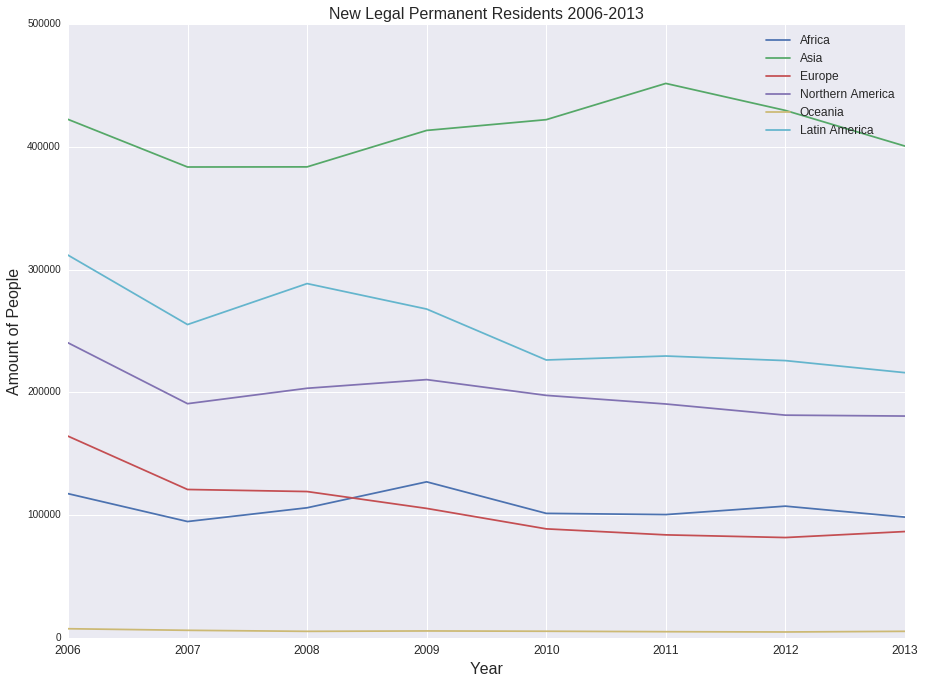

In [28]:
plt.figure(figsize=(15,11))
total_africa = [df[i]['Total'].loc[1] for i in range(8)]
total_asia = [df[i]['Total'].loc[2] for i in range(8)]
total_europe = [df[i]['Total'].loc[3] for i in range(8)]
total_north = [df[i]['Total'].loc[4] for i in range(8)]
total_oceania = [df[i]['Total'].loc[5] for i in range(8)]
total_latin = [df[i]['Total'].loc[6] for i in range(8)]
xticks = ('2006','2007','2008','2009','2010','2011','2012','2013')
legend = ('Africa','Asia','Europe','Northern America','Oceania','Latin America')

line_plot([total_africa,total_asia,total_europe,total_north,total_oceania,total_latin],'New Legal Permanent Residents 2006-2013','Year','Amount of People',xticks,legend)

In [121]:
years_change = defaultdict(dict)
for data in df.keys():
    for col in df[data].columns:  
        if col == 'index' or col == 'Origin':
            continue
        else:
            years_change[data][col] = df[data].nlargest(4, col)[col].to_dict()
years_change

defaultdict(<type 'dict'>, {0: {'Mississippi': {0: 1480.0, 2: 704.0, 3: 183.0, 6: 301.0}, 'South Dakota': {0: 1013.0, 1: 367.0, 2: 213.0, 3: 217.0}, 'Oklahoma': {0: 4591.0, 1: 465.0, 2: 1785.0, 6: 1445.0}, 'Delaware': {0: 2265.0, 1: 430.0, 2: 751.0, 6: 412.0}, 'Minnesota': {0: 18254.0, 1: 7308.0, 2: 6479.0, 3: 1965.0}, 'Illinois': {0: 52459.0, 2: 17774.0, 3: 14305.0, 6: 13794.0}, 'Arkansas': {0: 2926.0, 2: 959.0, 4: 417.0, 6: 1103.0}, 'New Mexico': {0: 3805.0, 2: 775.0, 4: 440.0, 6: 2141.0}, 'Indiana': {0: 8125.0, 2: 3090.0, 3: 1281.0, 6: 1634.0}, 'Maryland': {0: 30204.0, 1: 8808.0, 2: 9622.0, 4: 5699.0}, 'Louisiana': {0: 2693.0, 2: 1274.0, 4: 524.0, 6: 356.0}, 'Idaho': {0: 2377.0, 2: 533.0, 3: 504.0, 6: 964.0}, 'Wyoming': {0: 376.0, 2: 123.0, 3: 80.0, 6: 87.0}, 'Tennessee': {0: 10042.0, 1: 2511.0, 2: 3822.0, 6: 1482.0}, 'Arizona': {0: 21530.0, 2: 4628.0, 3: 2235.0, 6: 10783.0}, 'Iowa': {0: 4086.0, 1: 729.0, 2: 1167.0, 6: 1031.0}, 'Michigan': {0: 20911.0, 1: 1930.0, 2: 10281.0, 3: 4893

In [9]:
origin = {0:'Total',1:'Africa',2:'Asia',3:'Europe',4:'Northern America',5:'Oceania',6:'Latin America'}

In [19]:
for i in range(8):
    pass

In [210]:
df_temp = {}
group_years_change = defaultdict(dict)
for data in df.keys():
    df_temp[data] = df[data].transpose()[2:].apply(lambda x: pd.to_numeric(x, errors='coerce'))
    df_temp[data].columns = ['Total','Africa','Asia','Europe','Northern America','Oceania','Latin America']
    for col in df_temp[data].columns:
        group_years_change[data][col] = df_temp[data].nlargest(6, col)[col].to_dict()
#group_years_change

In [211]:
african = []
asian = []
european = []
northern = []
oceanic = []
latin = []
total = []
for i in range(8):
    asian.append(group_years_change[i]['Asia'])
    african.append(group_years_change[i]['Africa'])
    european.append(group_years_change[i]['Europe'])
    northern.append(group_years_change[i]['Northern America'])
    oceanic.append(group_years_change[i]['Oceania'])
    latin.append(group_years_change[i]['Latin America'])
    total.append(group_years_change[i]['Total'])

tot_asia = []
tot_africa = []
tot_europe = []
tot_north = []
tot_oceania = []
tot_latin = []
tot_tot = []
    
for i in range(8):
    tot_asia.append(sorted(asian[i],key=asian[i].get,reverse=True))
    tot_africa.append(sorted(african[i],key=african[i].get,reverse=True))
    tot_europe.append(sorted(european[i],key=european[i].get,reverse=True))
    tot_north.append(sorted(northern[i],key=northern[i].get,reverse=True))
    tot_oceania.append(sorted(oceanic[i],key=oceanic[i].get,reverse=True))
    tot_latin.append(sorted(latin[i],key=latin[i].get,reverse=True))
    tot_tot.append(sorted(total[i],key=total[i].get,reverse=True))


In [212]:
print 'Asia:'
tot_asia

Asia:


[['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois'],
 ['Total', 'California', 'New York', 'Texas', 'New Jersey', 'Illinois']]

In [213]:
print 'Africa:'
tot_africa

Africa:


[['Total', 'New York', 'California', 'Maryland', 'Texas', 'Minnesota'],
 ['Total', 'New York', 'California', 'Maryland', 'Texas', 'Massachusetts'],
 ['Total', 'New York', 'Maryland', 'California', 'Minnesota', 'Texas'],
 ['Total', 'New York', 'Texas', 'Minnesota', 'California', 'Maryland'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'Massachusetts'],
 ['Total', 'New York', 'Texas', 'Maryland', 'California', 'New Jersey']]

In [214]:
print 'Europe:'
tot_europe

Europe:


[['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'California', 'New York', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Illinois', 'Florida', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey'],
 ['Total', 'New York', 'California', 'Florida', 'Illinois', 'New Jersey']]

In [215]:
print 'Northern America:'
tot_north

Northern America:


[['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Texas'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Texas'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Texas'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Massachusetts'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Massachusetts'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Massachusetts'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Massachusetts'],
 ['Total', 'Florida', 'New York', 'California', 'New Jersey', 'Texas']]

In [216]:
print 'Oceania:'
tot_oceania

Oceania:


[['Total', 'California', 'New York', 'Washington', 'Florida', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Hawaii', 'Texas'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Hawaii'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Florida'],
 ['Total', 'California', 'New York', 'Washington', 'Texas', 'Utah']]

In [217]:
print 'Latin America:'
tot_latin

Latin America:


[['Total', 'California', 'Florida', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'California', 'Florida', 'Texas', 'New York', 'New Jersey'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'Illinois'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'New Jersey'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'New Jersey'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'New Jersey'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'Illinois'],
 ['Total', 'California', 'Texas', 'Florida', 'New York', 'New Jersey']]

In [218]:
print 'Total:'
tot_tot

Total:


[['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey'],
 ['Total', 'California', 'New York', 'Florida', 'Texas', 'New Jersey']]

In [244]:
year = '2006'
final_df = df[1].transpose()[2:]
final_df.columns = ['Total_'+year,'Asia_'+year,'Africa_'+year,'Europe_'+year,'Northern_America_'+year,'Oceania_'+year,'Latin_America_'+year]

for i in range(1,8):
    if i < 4:
        year = '200'+str(i+6)
    else:
        year = '20'+str(i+6)
    temp = df[i].transpose()[2:]
    temp.columns = ['Total_'+year,'Asia_'+year,'Africa_'+year,'Europe_'+year,'Northern_America_'+year,'Oceania_'+year,'Latin_America_'+year]
    final_df.append(temp)
    print final_df.shape
final_df

(54, 7)
(54, 7)
(54, 7)
(54, 7)
(54, 7)
(54, 7)
(54, 7)


,Total_2006,Asia_2006,Africa_2006,Europe_2006,Northern_America_2006,Oceania_2006,Latin_America_2006
Total,1.05242e+06,94711,383508,120821,190715,6101,255165
Alabama,3393,385,1489,489,363,19,643
Alaska,1617,68,966,222,156,42,160
Arizona,17528,1250,4291,1745,1415,91,8711
Arkansas,2722,118,878,258,377,9,1074
California,228941,8035,114231,19597,18941,2466,65352
Colorado,11039,1608,3237,1780,768,134,3501
Connecticut,12932,963,3917,2644,2688,48,2657
Delaware,2085,412,812,213,310,8,329
District of Columbia,2541,887,441,377,569,8,256


In [251]:
final_df.to_csv('final_df.csv',sep='\t')